# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu^* + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu^*}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import (ARIMA, Stats, PlotType)
from lib import (stack, fpoints, fcurve, curve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1.0
nsample = 1000

def cumu_mean_plot(φ, σ, μ, nsample):
    ar = ARIMA.Source.AR_OFFSET.create(φ=[φ], σ=σ, μ=μ, npts=nsample)
    mean = Stats.Func.CUMU_MEAN.apply(ar)
    ar1_mean = ARIMA.Func.AR1_OFFSET_MEAN.apply(ar, φ=φ, μ=μ)
    fcurve(data=mean, func=ar1_mean, title_offset=1.025, plot_type=PlotType.XLOG)
    
def cumu_sd_plot(φ, σ, μ, nsample):
    ar = ARIMA.Source.AR_OFFSET.create(φ=[φ], σ=σ, μ=μ, npts=nsample)
    sd = Stats.Func.CUMU_SD.apply(ar)
    ar1_sd = ARIMA.Func.AR1_OFFSET_SD.apply(ar, φ=φ, σ=σ)
    fcurve(data=sd, func=ar1_sd, title_offset=1.025, plot_type=PlotType.XLOG)
    
def comparison_plot_μ(μ_vals, ylim, title, *params):
    labels = [r"$μ^*=$" + f"{val}" for val in μ_vals]
    scan = ARIMA.Source.AR_OFFSET.create_parameter_scan(*params)
    stack(scan, ylim=ylim, title=title, labels=labels)
    
def comparison_plot_φ(φ_vals, ylim, title, *params):
    labels = [f"φ={val}" for val in φ_vals] 
    scan = ARIMA.Source.AR_OFFSET.create_parameter_scan(*params)
    stack(scan, ylim=ylim, title=title, labels=labels)

## Simulation $\varphi$ Scan

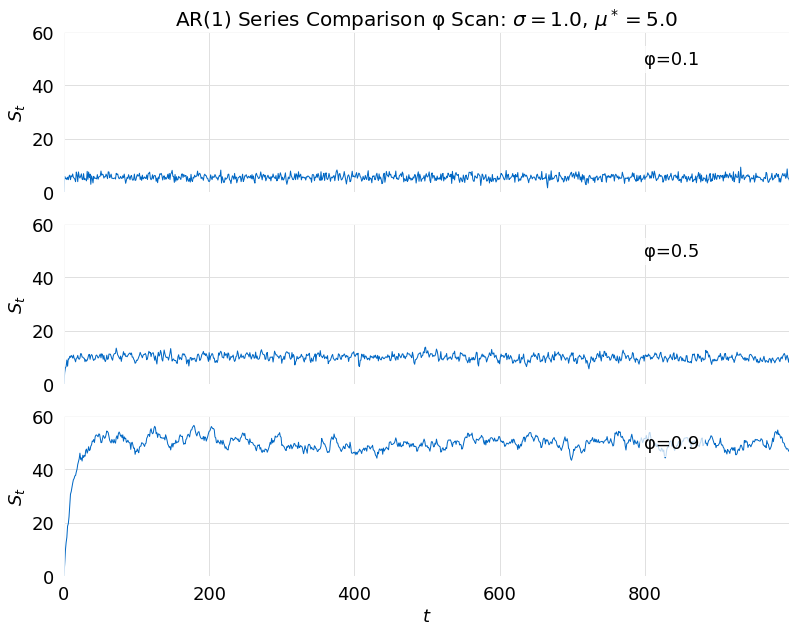

In [3]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: $σ={{{σ}}}$, $μ^*={{{μ}}}$"
φ_vals = [0.1, 0.5, 0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [0.0, 60.0], title, *params)

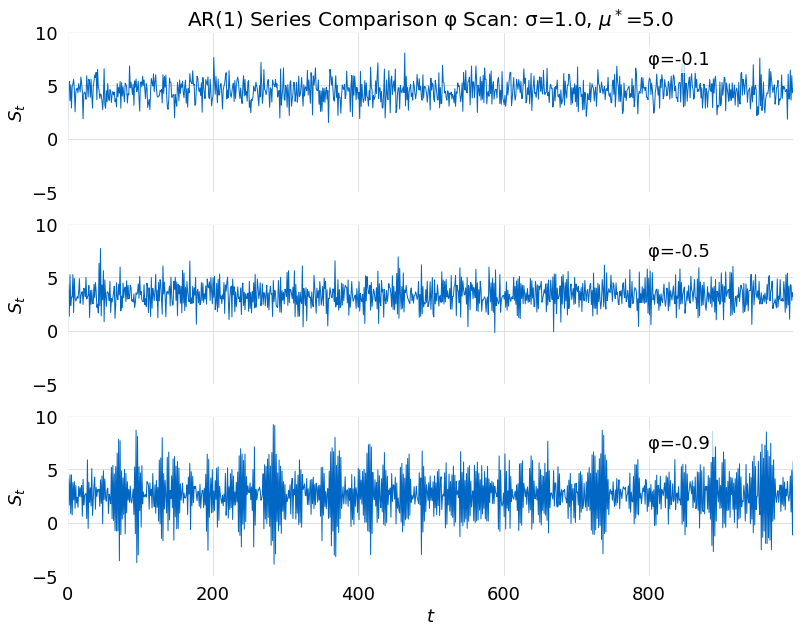

In [4]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ_vals = [-0.1, -0.5, -0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [-5.0, 10.0], title, *params)

## Simulation $\mu^*$ Scan

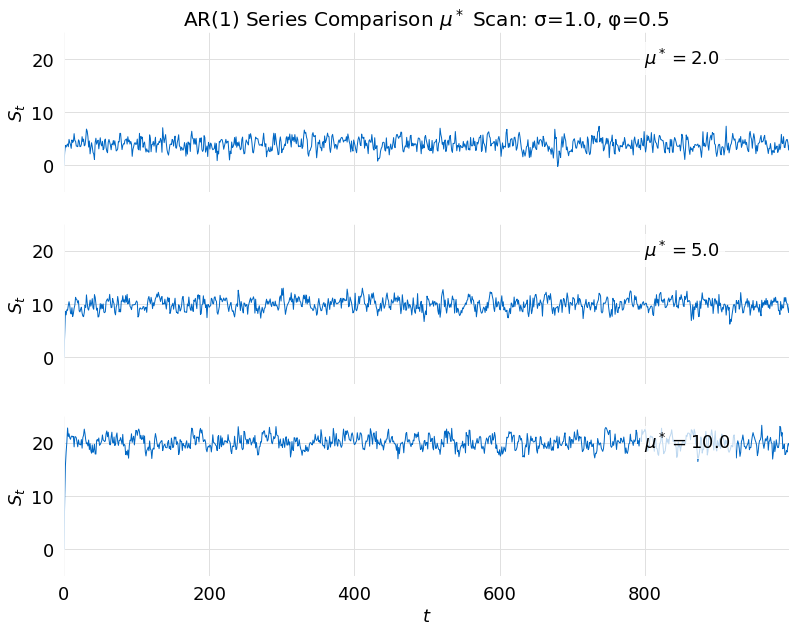

In [5]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [2.0, 5.0, 10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-5.0, 25.0], title, *params)

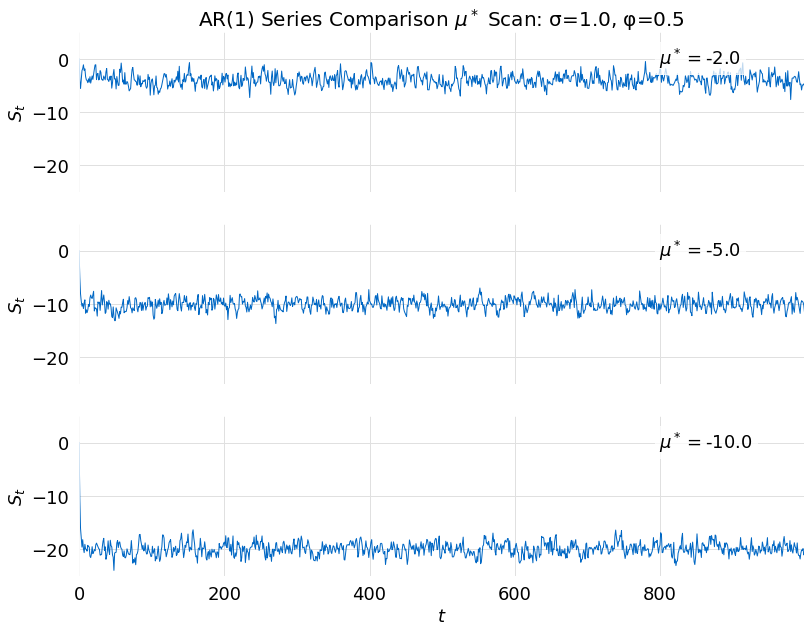

In [6]:
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [-2.0, -5.0, -10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-25.0, 5.0], title, *params)

## Mean

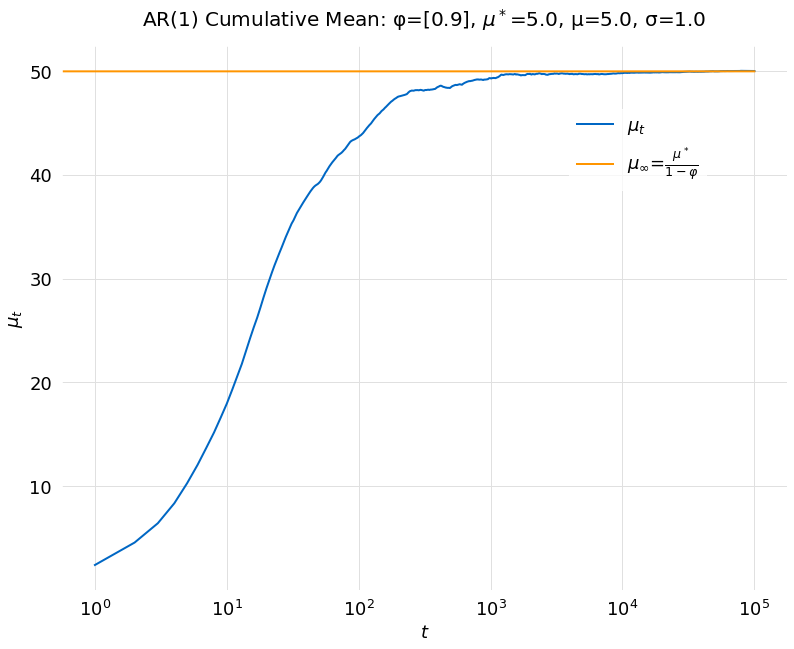

In [7]:
φ = 0.9
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

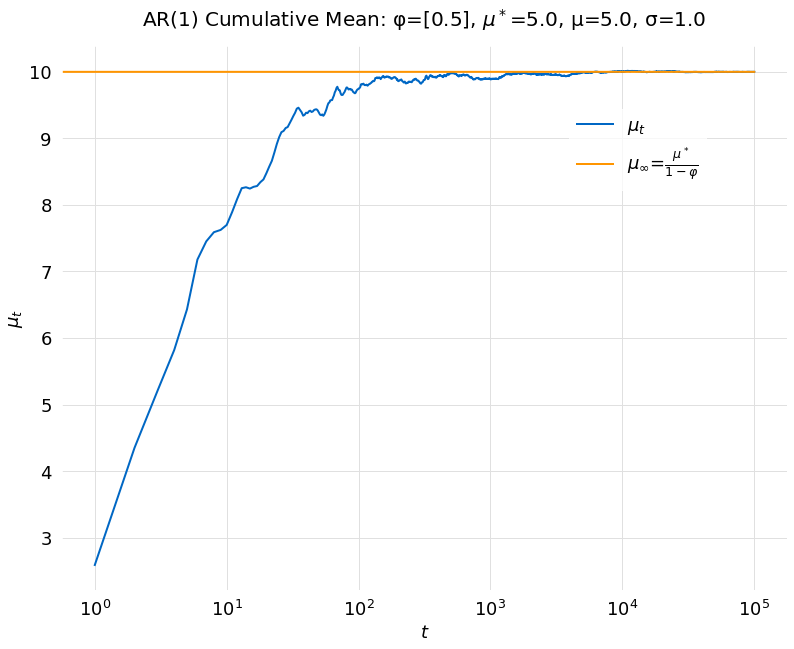

In [8]:
φ = 0.5
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

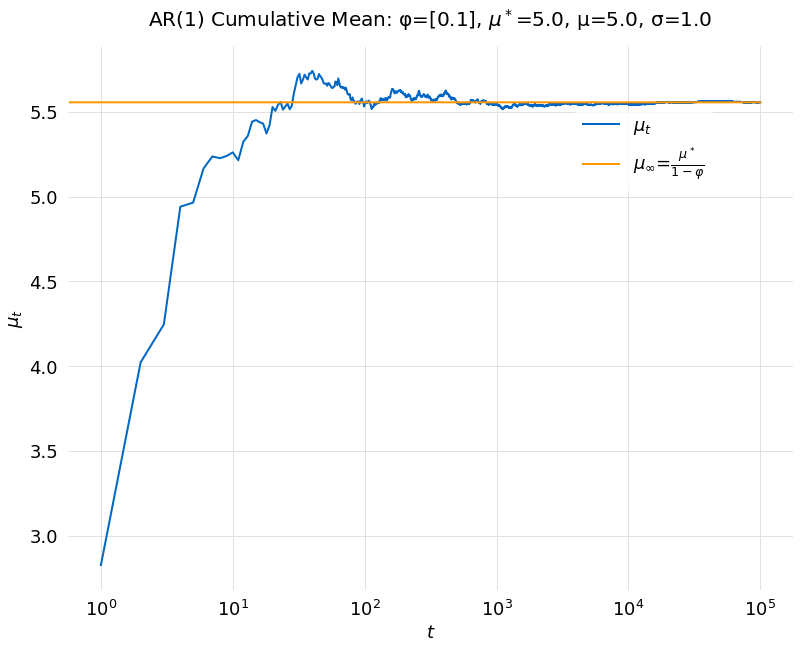

In [9]:
φ = 0.1
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

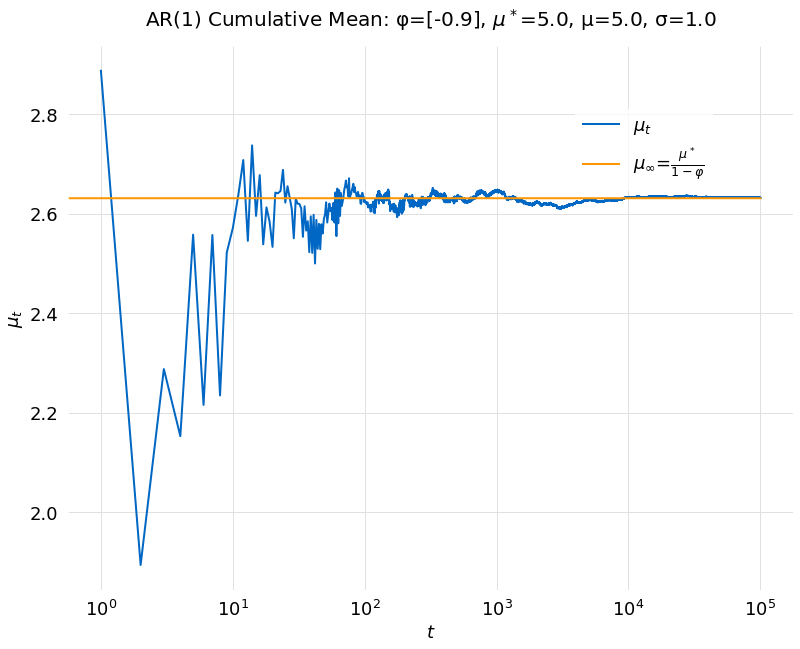

In [10]:
φ = -0.9
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

## Standard Deviation

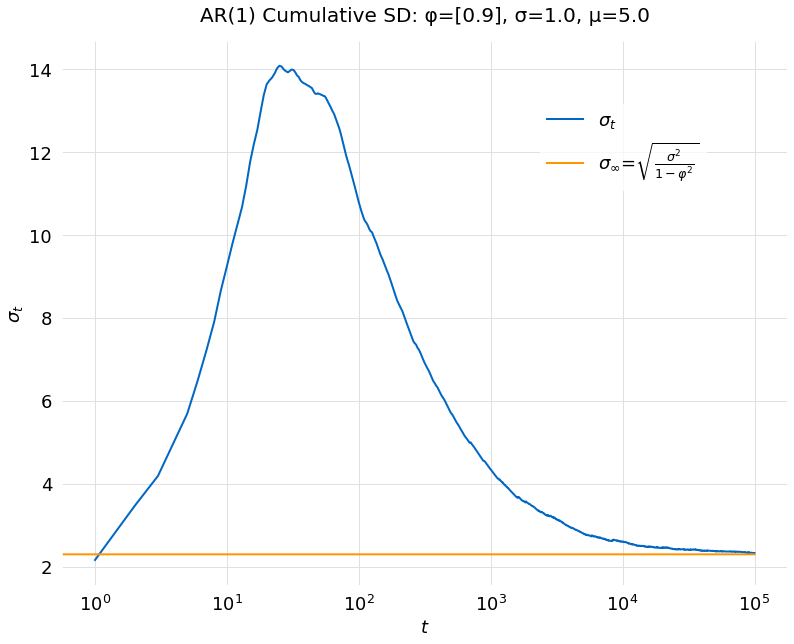

In [11]:
φ = 0.9
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

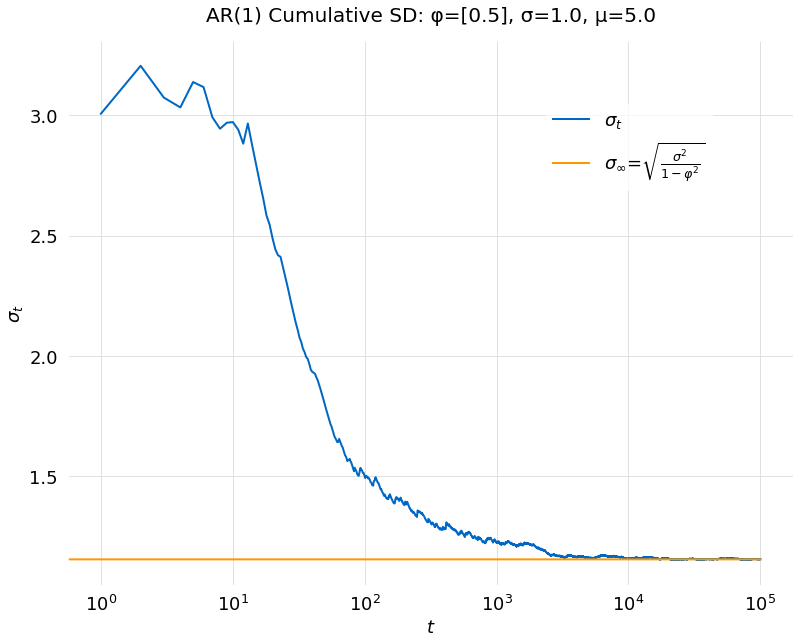

In [12]:
φ = 0.5
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

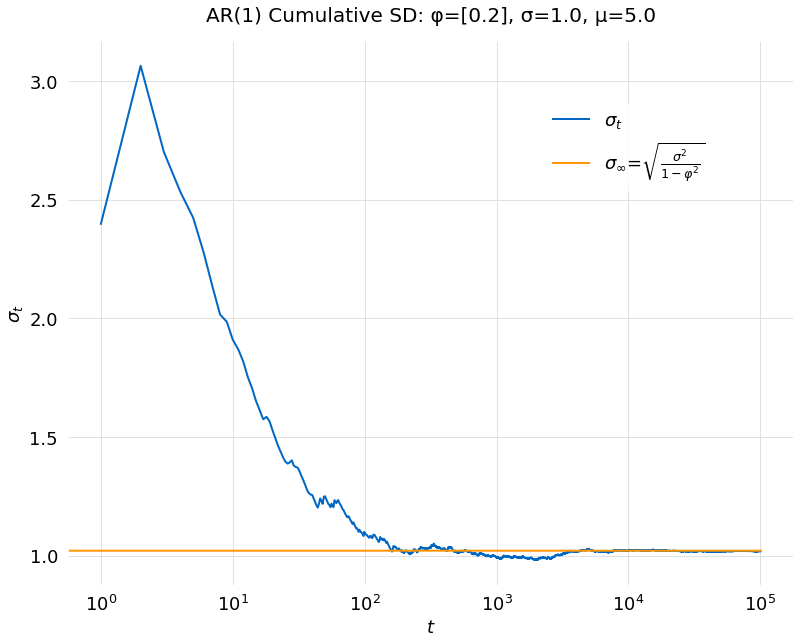

In [13]:
φ = 0.2
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

## Parameter Estimation

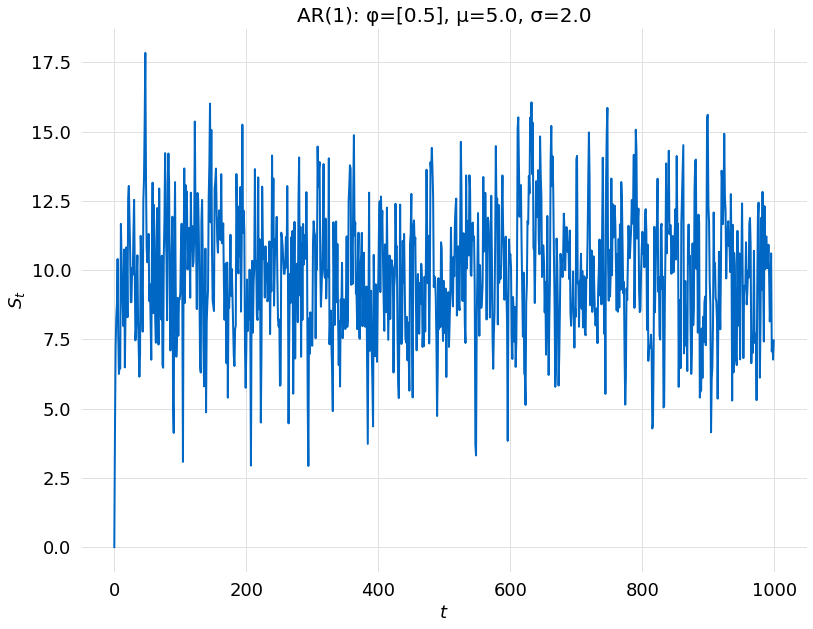

In [14]:
φ = 0.5
μ = 5.0
σ = 2.0
nsample = 1000
df = ARIMA.Source.AR_OFFSET.create(φ=[φ], μ=μ, σ=σ, npts=nsample)
curve(df)

In [15]:
results = ARIMA.Est.AR_OFFSET.perform(df, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2143.607
Date:                Sat, 16 Jul 2022   AIC                           4293.214
Time:                        16:18:43   BIC                           4307.937
Sample:                             0   HQIC                          4298.810
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8499      0.122     80.545      0.000       9.610      10.090
ar.L1          0.4714      0.027     17.714      0.000       0.419       0.524
sigma2         4.2591      0.185     22.976      0.000       3.896       4.622
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.17
Prob(Q):                              0.91   Prob(JB):                         0.34
Heteroskedasticity (H):               0.80   Skew:                            -0.09
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
df.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '16/07/2022 16:18:43',
 'Type': <Source.AR_OFFSET: 'AR_OFFSET'>,
 'Name': 'AR(1)-Offset-Simulation-d6934c78-9c65-40ba-8178-2b66ad91c4e8',
 'SchemaIterations': None,
 'AR_OFFSET': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.5], 'μ': 5.0, 'σ': 2.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Estimate Type': <Est.AR_OFFSET: 'AR_OFFSET'>,
    'Model Type': <EstModel.ARMA: 'ARMA'>,
    'Const': {'Estimate': 9.849858518488004,
     'Error': 0.12229078191571191,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.47136508301893604,
      'Error': 0.026609107344481717,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{

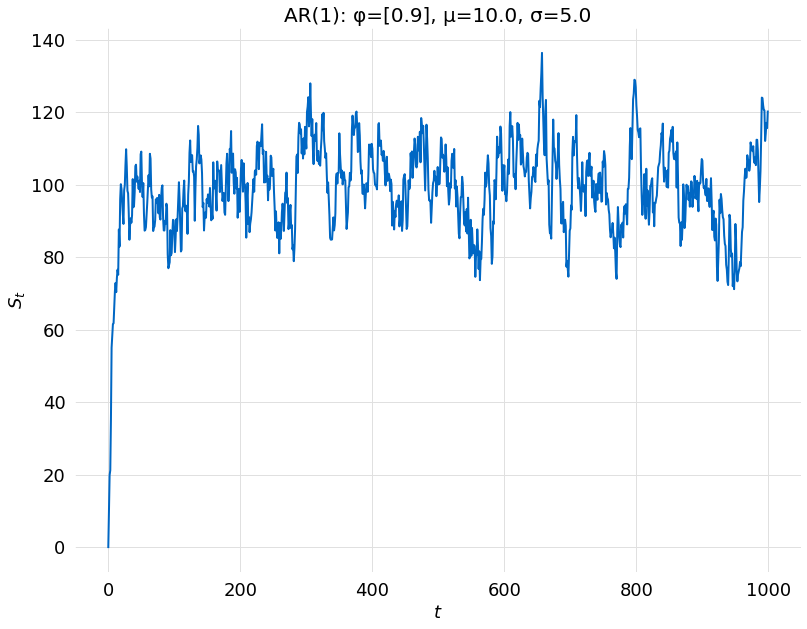

In [17]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
df = ARIMA.Source.AR_OFFSET.create(φ=[φ], μ=μ, σ=σ, npts=nsample)
curve(df)

In [18]:
results = ARIMA.Est.AR_OFFSET.perform(df, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3055.969
Date:                Sat, 16 Jul 2022   AIC                           6117.938
Time:                        16:18:43   BIC                           6132.661
Sample:                             0   HQIC                          6123.534
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.7021      2.696     36.241      0.000      92.418     102.986
ar.L1          0.9414      0.005    191.423      0.000       0.932       0.951
sigma2        26.3613      1.164     22.645      0.000      24.080      28.643
===================================================================================
Ljung-Box (L1) (Q):                   2.32   Jarque-Bera (JB):                85.34
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.13
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
df.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '16/07/2022 16:18:43',
 'Type': <Source.AR_OFFSET: 'AR_OFFSET'>,
 'Name': 'AR(1)-Offset-Simulation-09c74df4-7ef0-4493-8272-f7e4d6e9cd0b',
 'SchemaIterations': None,
 'AR_OFFSET': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.9], 'μ': 10.0, 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Estimate Type': <Est.AR_OFFSET: 'AR_OFFSET'>,
    'Model Type': <EstModel.ARMA: 'ARMA'>,
    'Const': {'Estimate': 97.70212941464135,
     'Error': 2.6958686471147235,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.9414391953841581,
      'Error': 0.004918118702865045,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$

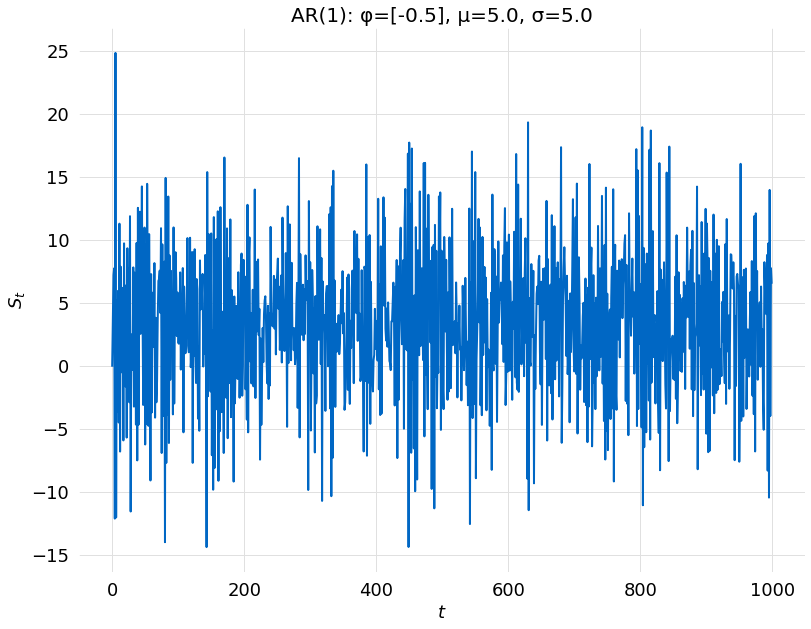

In [20]:
φ = -0.5
μ = 5.0
nsample = 1000
df = ARIMA.Source.AR_OFFSET.create(φ=[φ], μ=μ, σ=σ, npts=nsample)
curve(df)

In [21]:
results = ARIMA.Est.AR_OFFSET.perform(df, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3047.825
Date:                Sat, 16 Jul 2022   AIC                           6101.650
Time:                        16:18:43   BIC                           6116.373
Sample:                             0   HQIC                          6107.246
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2840      0.107     30.657      0.000       3.074       3.494
ar.L1         -0.5052      0.028    -18.313      0.000      -0.559      -0.451
sigma2        25.9839      1.200     21.655      0.000      23.632      28.336
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.53   Prob(JB):                         0.71
Heteroskedasticity (H):               0.95   Skew:                            -0.02
Prob(H) (two-sided):                  0.62   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
df.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '16/07/2022 16:18:43',
 'Type': <Source.AR_OFFSET: 'AR_OFFSET'>,
 'Name': 'AR(1)-Offset-Simulation-9a6746ee-d5c6-4571-9162-504db42a0ce1',
 'SchemaIterations': None,
 'AR_OFFSET': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [-0.5], 'μ': 5.0, 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Estimate Type': <Est.AR_OFFSET: 'AR_OFFSET'>,
    'Model Type': <EstModel.ARMA: 'ARMA'>,
    'Const': {'Estimate': 3.2839580024710524,
     'Error': 0.10711764112730764,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': -0.5052151609263296,
      'Error': 0.027588489190462962,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma